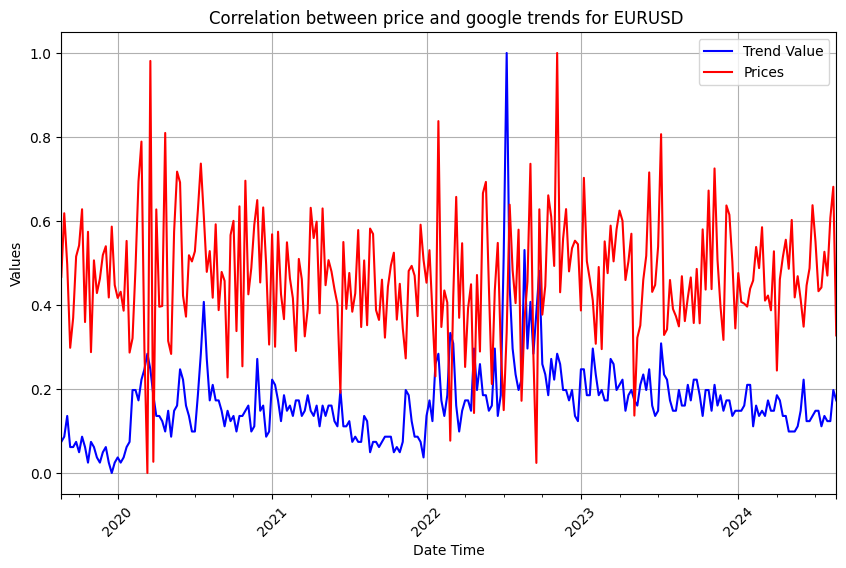

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

class visual_gtrend_trading:
    def __init__(self, symbol='AAPL',stock_or_forex='stock') -> None:
        self.symbol = symbol
        gtrend_df = self.get_google_trend_data(symbol=self.symbol)
        if stock_or_forex.lower() == 'stock':
            ticker_df = self.get_ticker_historical_data(ticker=self.symbol)
        elif stock_or_forex.lower() == 'forex':
            ticker_df = self.get_ticker_historical_data(ticker=f'{self.symbol}=X')
        ticker_df.reset_index(drop=True, inplace=True)
        ticker_df.index = gtrend_df.index
        gtrend_df, ticker_df = gtrend_df[symbol], ticker_df.Close
        price_series = self.calc_profitloss_percentage(ticker_df)
        scaled_gtrend_df = self.scale_series(gtrend_df)
        scaled_price_series = self.scale_series(price_series)
        self.plot_chart(scaled_gtrend_df, scaled_price_series)
        
    def get_ticker_historical_data(self, ticker="TSLA", period="5y", interval="1wk"):
        ticker = yf.Ticker(ticker)     
        df = ticker.history(period=period, interval=interval)
        return df

    def get_google_trend_data(self, symbol):
        pytrends = TrendReq(hl='en-US', tz=360)
        kw_list = [symbol]
        today = datetime.today()
        past_n_year = today - timedelta(days=5*365)
        start, end = f'{today.year}-{today.month}-{today.day}' , f'{past_n_year.year}-{past_n_year.month}-{past_n_year.day}'
        pytrends.build_payload(kw_list, cat=0, timeframe=f'{end} {start}')
        return pytrends.interest_over_time()
    
    def scale_series(self, series):
        min_val = series.min()
        max_val = series.max()
        scaled_series = (series - min_val) / (max_val - min_val)
        return scaled_series
                
    def calc_profitloss_percentage(self,series):
        profit_loss_list = []
        for i in range(len(series)):
            if i == 0:
                profit_loss_list.append(0)
                continue
            else:
                curr_price, prev_price = series[i],series[i-1]
                if prev_price > curr_price: #loss
                    percentage_loss = -((prev_price-curr_price)/prev_price)*100
                    profit_loss_list.append(percentage_loss)
                elif prev_price < curr_price: #profit
                    percentage_profit = ((curr_price-prev_price)/prev_price)*100
                    profit_loss_list.append(percentage_profit)
                else:
                    profit_loss_list.append(0)
        pdseries = pd.Series(profit_loss_list, index=series.index)
        return pdseries    
    
    def plot_chart(self, trend_series, price_series):
        plt.figure(figsize=(10, 6))
        trend_series.plot(marker='', linestyle='-', color='b', label='Trend Value')
        price_series.plot(marker='', linestyle='-', color='r', label='Prices')
        plt.title(f'Correlation between price and google trends for {self.symbol} ')
        plt.xlabel('Date Time')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.show()

    
vz = visual_gtrend_trading(symbol='EURUSD',stock_or_forex='forex')


In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
